# Elo Merchant Category Recommendation
## Help understand customer loyalty

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.

## Root Mean Squared Error (RMSE)
Submissions are scored on the root mean squared error. RMSE is defined as: where y^ is the predicted loyalty score for each card_id, and y is the actual loyalty score assigned to a card_id.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns

## New Transactions

In [28]:
#Import Data
new_transactions = pd.read_csv('new_merchant_transactions.csv', parse_dates=['purchase_date'])
print(np.shape(new_transactions))
new_transactions.head()

(1963031, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [3]:
print('Numer of card_id', len(new_transactions.card_id.unique()))
print('Numer of merchant', len(new_transactions.merchant_id.unique()))

Numer of card_id 290001
Numer of merchant 226130


In [55]:
len(new_transactions.card_id.unique())

290001

/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


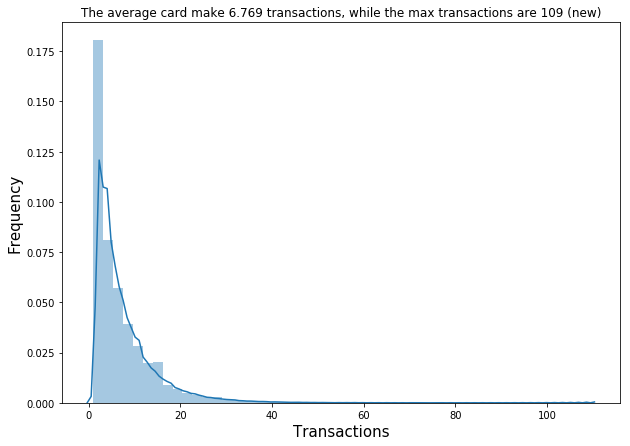

In [41]:
gdf = new_transactions.groupby("card_id").size()
g_card = gdf.to_frame().reset_index().rename(columns={0:'transactions'})
plt.figure(figsize=(10,7))
sns.distplot(g_card['transactions'])
plt.title('The average card make 6.769 transactions, while the max transactions are 109 (new)')
plt.xlabel("Transactions", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b89e5f080>,
      dtype=object)

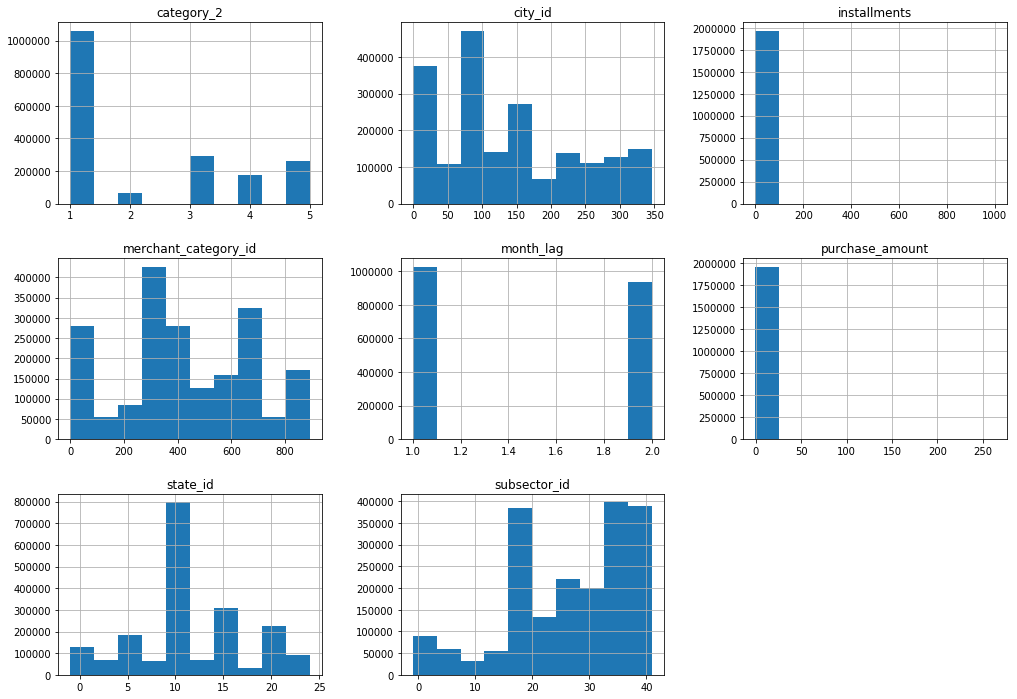

In [5]:
new_transactions.hist(figsize = (17,12))

In [6]:
print("The average makes {:.3f} transactions, while the max transactions are {}.".format(g_card['transactions'].mean(),g_card['transactions'].max()))

The average makes 6.769 transactions, while the max transactions are 109.


In [39]:
gdf = new_transactions.groupby("merchant_id").size()
g_merch = gdf.to_frame().reset_index().rename(columns={0:'transactions'})
g_merch.sort_values(by='transactions', ascending=False).head(10)

,merchant_id,transactions
594,M_ID_00a6ca8a8a,23018
181358,M_ID_cd2c0b07e9,19118
128615,M_ID_9139332ccc,14220
71530,M_ID_50f575c681,13778
101204,M_ID_725a60d404,7029
150145,M_ID_a9d91682ad,5980
223021,M_ID_fc7d7969c3,3817
80967,M_ID_5ba019a379,3540
135145,M_ID_98b342c0e3,3445
7410,M_ID_0855bda176,3290


/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


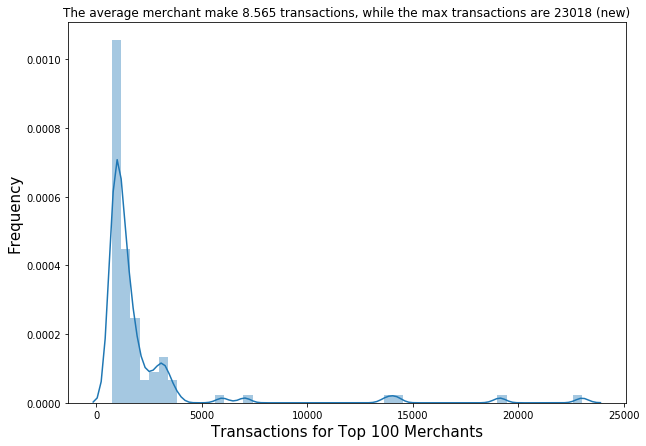

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(g_merch.sort_values(by='transactions', ascending=False)['transactions'].head(100))
plt.title('The average merchant make 8.565 transactions, while the max transactions are 23018 (new)')
plt.xlabel("Transactions for Top 100 Merchants", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);
plt.show()

In [9]:
print("The average merchant has {:.3f} transactions, while the max transactions are {}.".format(g_merch['transactions'].mean(),g_merch['transactions'].max()))

The average merchant has 8.565 transactions, while the max transactions are 23018.


In [48]:
new_transactions["year"] = new_transactions["purchase_date"].dt.year
new_transactions["month"] = new_transactions["purchase_date"].dt.month
new_transactions["year_month"] = new_transactions["purchase_date"].dt.strftime('%Y/%m')
cross_ts1 = pd.crosstab(new_transactions.card_id, new_transactions.year_month, values=new_transactions.purchase_amount, aggfunc='sum')
cross_ts = cross_ts1.fillna(0).values.tolist()

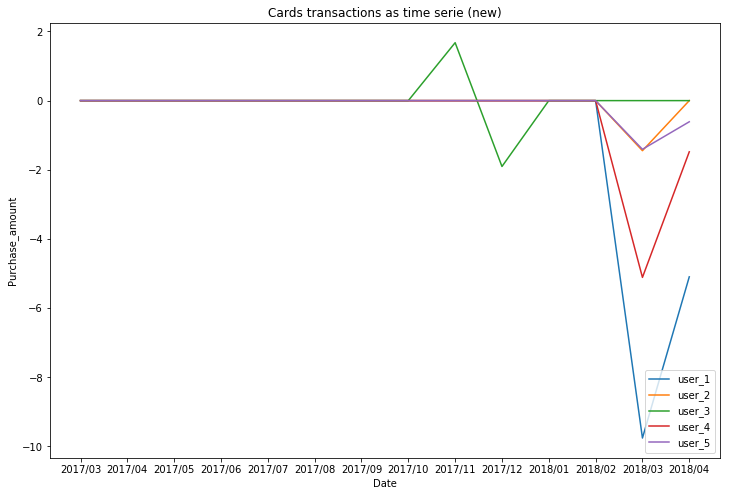

In [49]:
import seaborn as sns
from datetime import datetime
color = sns.color_palette()

plt.figure(figsize=(12,8))
plt.plot( cross_ts1.columns,cross_ts[1])
plt.plot(cross_ts1.columns, cross_ts[2])
plt.plot(cross_ts1.columns,cross_ts[3])
plt.plot(cross_ts1.columns,cross_ts[4])
plt.plot(cross_ts1.columns,cross_ts[5])

plt.legend(['user_1', 'user_2', 'user_3', 'user_4', 'user_5'], loc='lower right')
plt.ylabel('Purchase_amount')
plt.xlabel('Date')
plt.title('Cards transactions as time serie (new)')
plt.show()

In [67]:
new_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 17 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
year                    int64
month                   int64
year_month              object
dtypes: datetime64[ns](1), float64(2), int64(8), object(6)
memory usage: 254.6+ MB


## Merchants

In [42]:
merchants = pd.read_csv('merchants.csv')
print(np.shape(merchants))
merchants.head()

(334696, 22)


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [86]:
merchants.category_2.unique()

array([ 1.,  5., nan,  2.,  3.,  4.])

In [44]:
merchants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7dffd7b8>,
      dtype=object)

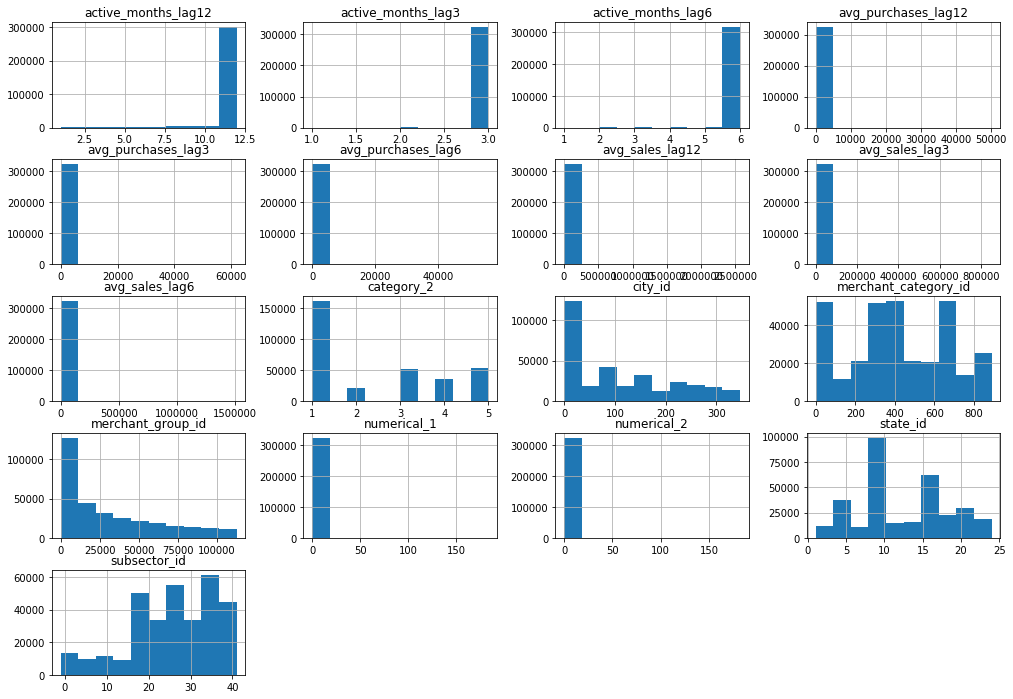

In [49]:
merchants.dropna().hist(figsize = (17,12))

## Historical Transactions

In [2]:
historical_transactions = pd.read_csv('historical_transactions.csv', parse_dates=['purchase_date'])
print(np.shape(historical_transactions))
historical_transactions.head()

(29112361, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [26]:
len(historical_transactions.subsector_id.unique())

41

In [33]:
set_hist=set(historical_transactions.merchant_id)
set_new=set(new_transactions.merchant_id)

In [34]:
len(set_hist-set_new)

108504

In [35]:
len(set_new-set_hist)

8322

/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


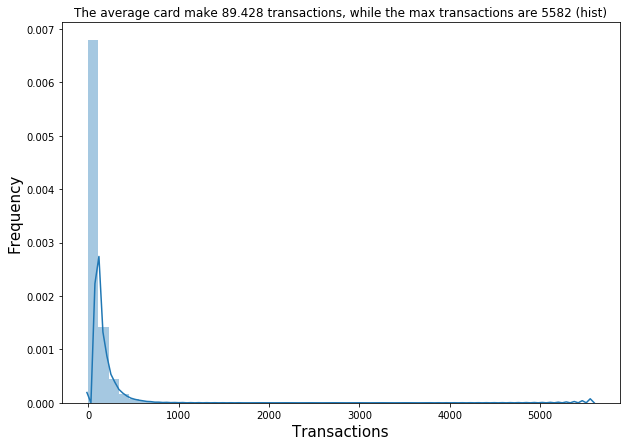

In [50]:
gdf = historical_transactions.groupby("card_id").size()
g_card = gdf.to_frame().reset_index().rename(columns={0:'transactions'})
plt.figure(figsize=(10,7))
sns.distplot(g_card['transactions'])
plt.title('The average card make 89.428 transactions, while the max transactions are 5582 (hist)')
plt.xlabel("Transactions", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a737c7240>,
      dtype=object)

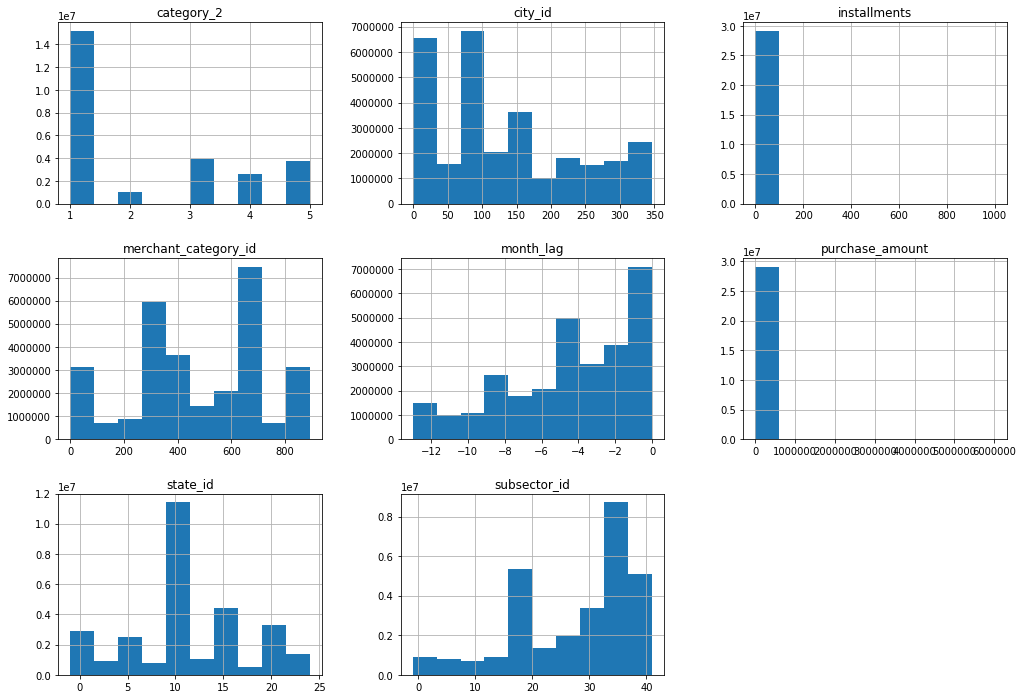

In [6]:
historical_transactions.hist(figsize = (17,12))

In [7]:
print("The average makes {:.3f} transactions, while the max transactions are {}.".format(g_card['transactions'].mean(),g_card['transactions'].max()))

The average makes 89.428 transactions, while the max transactions are 5582.


/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


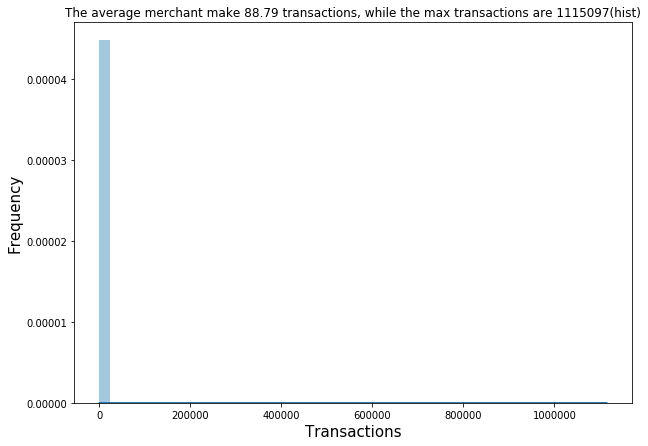

In [51]:
gdf = historical_transactions.groupby("merchant_id").size()
g_card = gdf.to_frame().reset_index().rename(columns={0:'transactions'})
plt.figure(figsize=(10,7))
sns.distplot(g_card['transactions'])
plt.title('The average merchant make 88.79 transactions, while the max transactions are 1115097(hist)')
plt.xlabel("Transactions", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);
plt.show()

In [9]:
print("The average merchant has {:.3f} transactions, while the max transactions are {}.".format(g_card['transactions'].mean(),g_card['transactions'].max()))

The average merchant has 88.792 transactions, while the max transactions are 1115097.


In [98]:
historical_transactions['purchase_date']=pd.to_datetime(historical_transactions['purchase_date'])

In [ ]:
historical_transactions["year"] = historical_transactions["purchase_date"].dt.year
historical_transactions["month"] = historical_transactions["purchase_date"].dt.month
historical_transactions["year_month"] = historical_transactions["purchase_date"].dt.strftime('%m/%Y')
cross_ts1 = pd.crosstab(historical_transactions.card_id, historical_transactions.year_month, values=historical_transactions.purchase_amount, aggfunc='sum')
cross_ts = cross_ts1.fillna(0).values.tolist()

In [ ]:
color = sns.color_palette()

plt.figure(figsize=(12,8))
plt.plot( cross_ts1.columns,cross_ts[1])
plt.plot(cross_ts1.columns, cross_ts[2])
plt.plot(cross_ts1.columns,cross_ts[3])
plt.plot(cross_ts1.columns,cross_ts[4])
plt.plot(cross_ts1.columns,cross_ts[5])

plt.legend(['user_1', 'user_2', 'user_3', 'user_4', 'user_5'], loc='lower right')
plt.ylabel('Purchase_amount')
plt.xlabel('Date')
plt.title('Cards transactions as time serie')
plt.show()

## Test

In [46]:
test = pd.read_csv('test.csv', parse_dates=["first_active_month"])
print(np.shape(test))
test.head()

(123623, 5)


,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


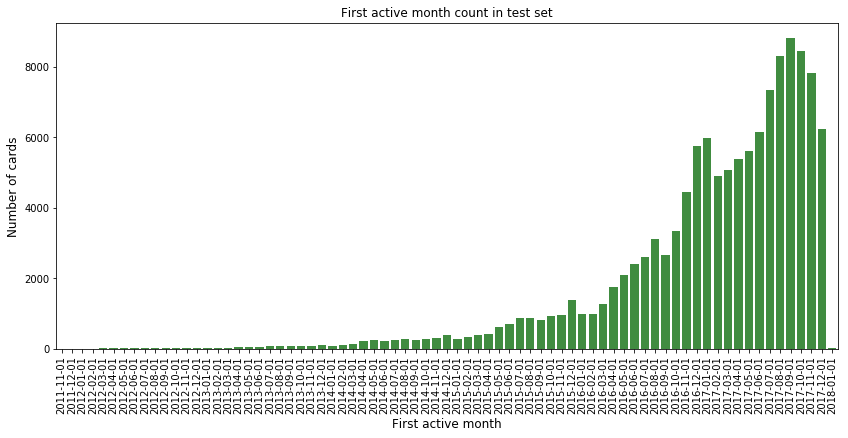

In [47]:
cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

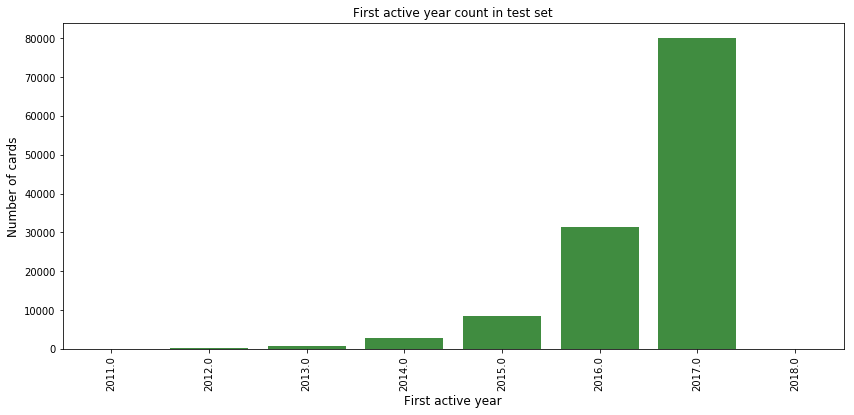

In [48]:
test["year"] = test["first_active_month"].dt.year
test["month"] = test["first_active_month"].dt.month
cnt_srs = test['year'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active year', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active year count in test set")
plt.show()


In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 7 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
year                  123622 non-null float64
month                 123622 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 6.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f656822c2e8>,
      dtype=object)

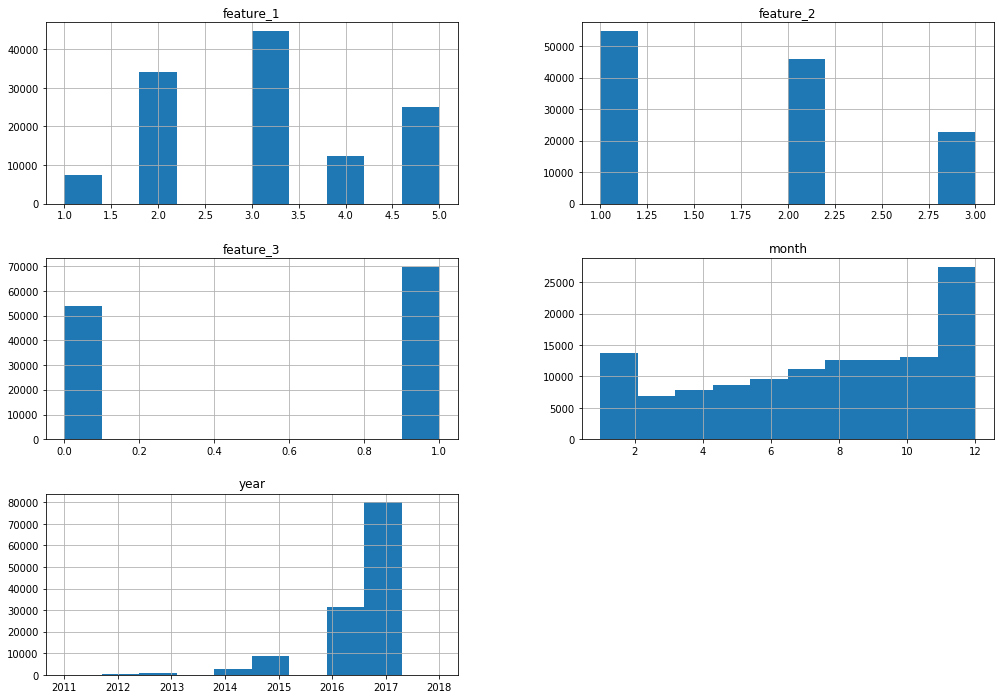

In [50]:
test.hist(figsize = (17,12))

In [54]:
test.first_active_month.unique()

array(['2017-04-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2017-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2013-09-01

## Train

In [34]:
train = pd.read_csv('train.csv', parse_dates=["first_active_month"])
print(np.shape(train))
train.head()

(201917, 6)


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


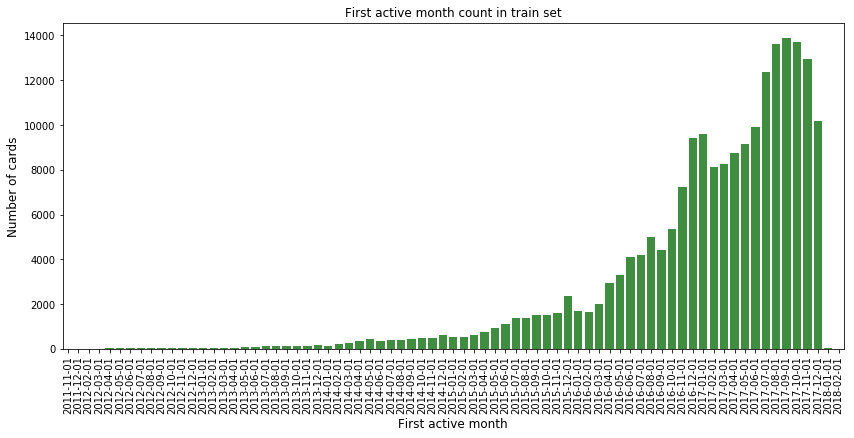

In [35]:
cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

In [ ]:
d1 = train['first_active_month'].value_counts().sort_index()
d2 = test['first_active_month'].value_counts().sort_index()
plt.plot(d1)
plt.plot(d2)

plt.legend(['train', 'test'])
plt.ylabel('Amount of cards')
plt.xlabel('first active year')
plt.title('Count of first active')
plt.show()

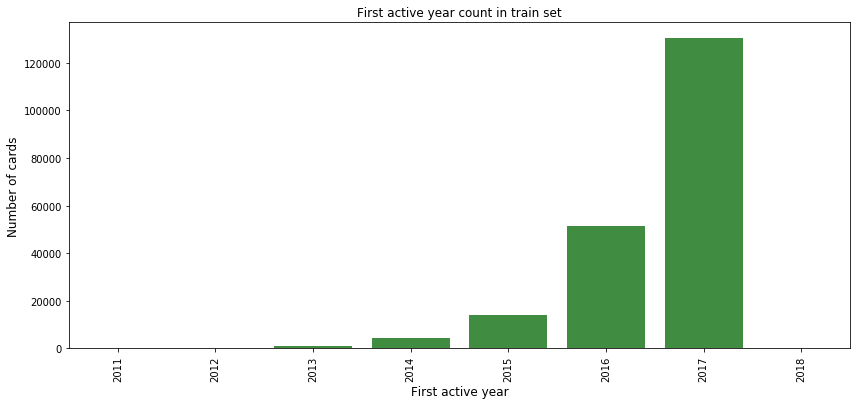

In [36]:
train["year"] = train["first_active_month"].dt.year
train["month"] = train["first_active_month"].dt.month

cnt_srs = train['year'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active year', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active year count in train set")
plt.show()

/home/grecia/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


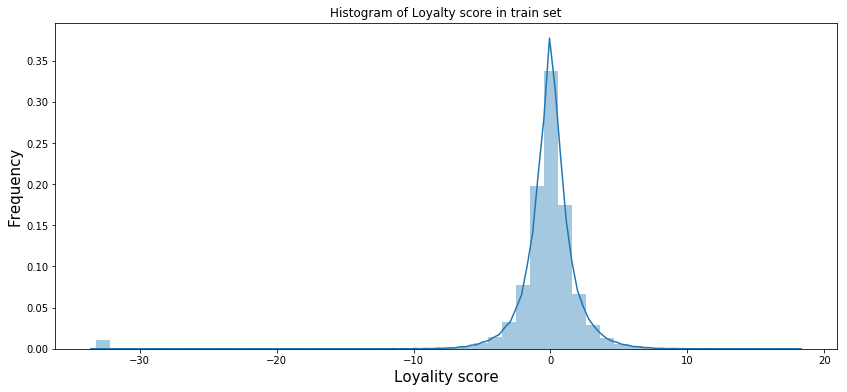

In [37]:
#histogram
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(train['target'].values)
plt.title("Histogram of Loyalty score in train set")
plt.xlabel("Loyality score", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

In [38]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

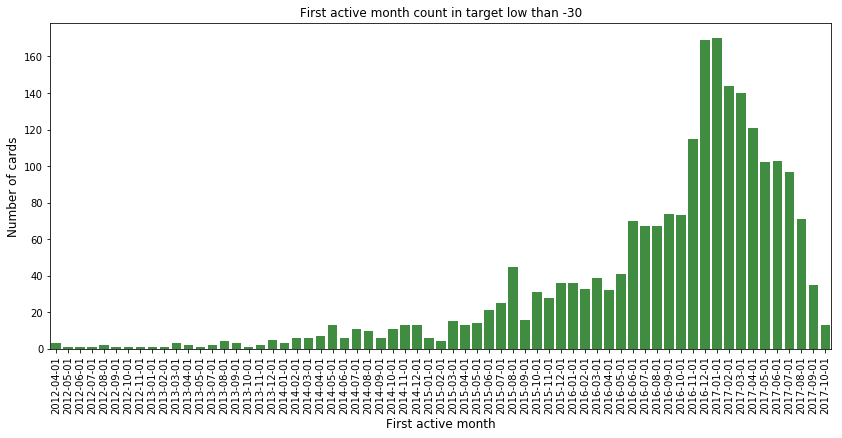

In [39]:
train_low_m30 = train[train['target']<-30]
cnt_srs = train_low_m30['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in target low than -30")
plt.show()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 8 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
year                  201917 non-null int64
month                 201917 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 12.3+ MB


In [45]:
train.feature_3.unique()

array([1, 0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f656a61de80>,
      dtype=object)

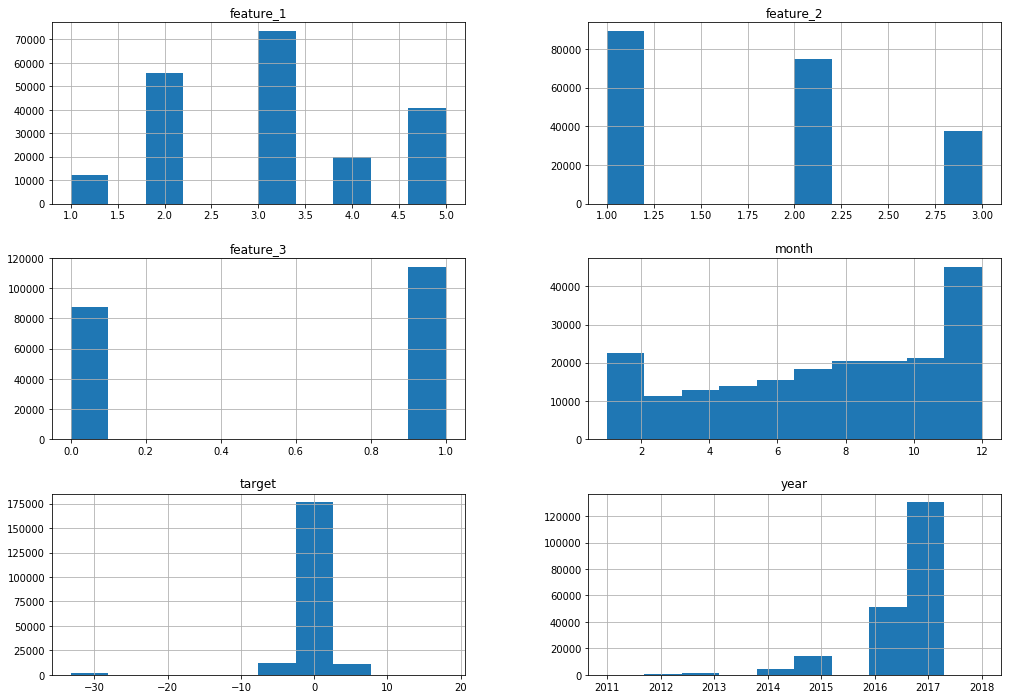

In [41]:
train.hist(figsize = (17,12))

In [32]:
train[train['card_id']=='C_ID_cdbd2c0db2']

,first_active_month,card_id,feature_1,feature_2,feature_3,target
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [31]:
test[test['card_id']=='C_ID_cdbd2c0db2']

,first_active_month,card_id,feature_1,feature_2,feature_3


In [26]:
new_transactions[new_transactions['card_id']=='C_ID_4e6213e9bc']

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
1905835,Y,C_ID_4e6213e9bc,-1,N,0,A,528,M_ID_44b78002d2,2,-0.703331,2018-04-29 12:52:33,NaN,-1,25
1905836,Y,C_ID_4e6213e9bc,69,N,0,A,68,M_ID_e1a0b74f32,2,-0.649235,2018-04-29 18:13:17,1.0,9,27


In [30]:
historical_transactions[historical_transactions['card_id']=='C_ID_cdbd2c0db2'].sort_values('purchase_date')

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
18964502,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_9f99aa4a8f,-3,-0.633352,2017-11-12 00:00:00,4.0,22,37
18964504,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_331b7a704b,-3,-0.652692,2017-11-12 00:15:38,4.0,22,37
18964415,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_48257bb851,-3,-0.700776,2017-11-13 14:36:07,4.0,22,37
18964409,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_cecefd9589,-3,-0.701783,2017-11-14 00:00:00,4.0,22,37
18964431,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_1569adb933,-3,-0.608964,2017-11-15 17:39:53,4.0,22,37
18964520,Y,C_ID_cdbd2c0db2,143,N,1,B,506,M_ID_a9d91682ad,-3,-0.648154,2017-11-16 14:58:52,5.0,5,30
18964513,Y,C_ID_cdbd2c0db2,17,N,1,B,289,M_ID_71bb19653e,-3,-0.426543,2017-11-16 17:19:24,4.0,22,27
18964526,Y,C_ID_cdbd2c0db2,17,N,1,B,278,M_ID_cecefd9589,-3,-0.701558,2017-11-17 00:00:00,4.0,22,37
18964512,Y,C_ID_cdbd2c0db2,17,N,1,B,818,M_ID_44cd2fb0bf,-3,-0.531578,2017-11-17 00:28:41,4.0,22,12
18964453,Y,C_ID_cdbd2c0db2,17,N,1,B,705,M_ID_0b53b8c009,-3,-0.621151,2017-11-17 22:13:18,4.0,22,33
